In [1]:
# pip install opencv-python-headless numpy

In [1]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('./text21.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert the grayscale image to a NumPy array
gray_array = np.array(gray_image)

# Display the shape of the NumPy array
print(gray_array.shape)

# Optionally, save the grayscale image
cv2.imwrite('grayscale_image.jpg', gray_image)


(100, 100)


True

In [2]:
max(gray_array[0])

208

In [3]:
# import cv2
# import numpy as np

# # Ask the user for the image file path
# image_path = input("Enter the path to the image file: ")

# try:
#     # Load the image
#     image = cv2.imread(image_path)

#     # Convert the image to grayscale
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Convert the grayscale image to a NumPy array
#     gray_array = np.array(gray_image)

#     # Display the shape of the NumPy array
#     print("Shape of the grayscale array:", gray_array.shape)

#     # Optionally, save the grayscale image
#     cv2.imwrite('grayscale_image.jpg', gray_image)

# except Exception as e:
#     print("An error occurred:", e)


In [4]:
# import random

# def generate_random_pixels(width, height, pixel_range):
#     pixels = [[(random.randint(pixel_range[0], pixel_range[1]))
#                for _ in range(width)]
#               for _ in range(height)]
#     return pixels

# # Define parameters
# width = 800
# height = 600
# pixel_range = (0, 49)  # Example: for grayscale L=50

# Generate 2D array of pixels
array1 = gray_array
array = np.array(array1, dtype=np.int16)



In [5]:
shape = gray_array.shape
width = shape[1]
height = shape[0]
pixel_range = (0, 255)
m=10 #horizontal j
n=10 #vertical i
d1 = 1 # horizontal
d2 = 0 # vertical

In [6]:
arr1 = {i: 0 for i in range(2*pixel_range[1]+1)}
arr2 = {i: 0 for i in range(-pixel_range[1], pixel_range[1]+1)}
temp_sum = {i: 0 for i in range(2*pixel_range[1]+1)}
temp_diff = {i: 0 for i in range(-pixel_range[1], pixel_range[1]+1)}

In [7]:
import numpy as np

In [8]:
import math

def ASM(S,D):
    Psum=0
    Pdiff=0

    for i in range(0,len(S)):
        Psum += (S[i])**2

    for i in range(0,len(S)):
        Pdiff += (D[i])**2

    return Psum*Pdiff

def IDM(S,D):
    Sum=0
    L= (len(D)+1)/2
    for j in range(0,len(D)):
        Sum += D[j]/(1+(j-L+1)**2)

    return Sum

def CON(S,D):
    Sum=0
    L= (len(D)+1)/2
    for j in range(0,len(D)):
        Sum += ((j-L+1)**2)*D[j]

    return Sum

def ENT(S,D):
    SumS=0
    SumD=0

    for i in range(0,len(S)):
        if(S[i]!=0):
            SumS += S[i]*(math.log10(S[i]))
        if(D[i]!=0):
            SumD += D[i]*(math.log10(D[i]))

    return -SumS-SumD

In [9]:
asm = np.array([[0 for j in range(width-m)] for i in range(height-n)],dtype=float)
idm = np.array([[0 for j in range(width-m)] for i in range(height-n)],dtype=float)
con = np.array([[0 for j in range(width-m)] for i in range(height-n)],dtype=float)
ent = np.array([[0 for j in range(width-m)] for i in range(height-n)],dtype=float)

In [10]:
def norm(ar):
  sum = np.sum(ar)
  normalized_data = ar / sum
  return normalized_data


In [11]:
for k in range(height-n):
  for l in range(width-m):
    arr1 = {i: 0 for i in range(2*pixel_range[1]+1)}
    arr2 = {i: 0 for i in range(-pixel_range[1], pixel_range[1]+1)}
    for i in range(n-d2):
      for j in range(m-d1):
        arr1[array[k+i][l+j]+array[k+i+d2][l+j+d1]] = arr1[array[k+i][l+j]+array[k+i+d2][l+j+d1]] + 1

        arr2[array[k+i][l+j]-array[k+i+d2][l+j+d1]] = arr2[array[k+i][l+j]-array[k+i+d2][l+j+d1]] + 1

        if(j==0):
          temp_sum[array[k+i][l+j]+array[k+i+d2][l+j+d1]] = temp_sum[array[k+i][l+j]+array[k+i+d2][l+j+d1]] + 1
          temp_diff[array[k+i][l+j]-array[k+i+d2][l+j+d1]] = temp_diff[array[k+i][l+j]-array[k+i+d2][l+j+d1]] + 1

    S = norm(np.array(list(arr1.values())))
    D = norm(np.array(list(arr2.values())))
    # print(np.array(list(arr1.values())), S, np.array(list(arr2.values())), D)
    asm[k][l]=float(ASM(S,D))
    idm[k][l]=float(IDM(S,D))
    con[k][l]=float(CON(S,D))
    ent[k][l]=float(ENT(S,D))


In [12]:
asm

array([[0.00322512, 0.002457  , 0.00218113, ..., 0.00533656, 0.0046032 ,
        0.00365798],
       [0.00349032, 0.00263167, 0.00215272, ..., 0.0056128 , 0.00494321,
        0.00373419],
       [0.0035961 , 0.00276848, 0.00213626, ..., 0.00560671, 0.00507179,
        0.00372504],
       ...,
       [0.00053297, 0.00057211, 0.00055967, ..., 0.00071733, 0.00065185,
        0.00077086],
       [0.00052724, 0.00054803, 0.00053638, ..., 0.00077458, 0.00073086,
        0.00077824],
       [0.00047188, 0.00050968, 0.00046554, ..., 0.00077866, 0.00077147,
        0.00082731]])

In [13]:
idm

array([[0.12912155, 0.12826529, 0.12812764, ..., 0.21177769, 0.17932369,
        0.15566892],
       [0.13070997, 0.14074016, 0.13984046, ..., 0.22400791, 0.19161317,
        0.15642027],
       [0.12928873, 0.14991967, 0.14885702, ..., 0.22425981, 0.19202315,
        0.14650388],
       ...,
       [0.06979   , 0.08146295, 0.09297412, ..., 0.08419609, 0.06208059,
        0.07316173],
       [0.08056264, 0.09229231, 0.10393203, ..., 0.10703755, 0.09601216,
        0.08491256],
       [0.06927124, 0.08084424, 0.08141481, ..., 0.10663549, 0.09554738,
        0.08457512]])

In [14]:
con

array([[ 187.63333333,  186.56666667,  217.56666667, ...,  102.82222222,
         117.51111111,  141.05555556],
       [ 172.64444444,  174.64444444,  214.        , ...,  103.        ,
         118.23333333,  143.84444444],
       [ 186.21111111,  184.3       ,  229.62222222, ...,  103.96666667,
         123.13333333,  148.12222222],
       ...,
       [1299.78888889, 1228.21111111, 1099.86666667, ..., 1335.96666667,
        1299.58888889, 1082.44444444],
       [1387.35555556, 1325.36666667, 1178.44444444, ..., 1218.67777778,
        1193.75555556,  997.11111111],
       [1539.66666667, 1417.78888889, 1273.3       , ..., 1252.04444444,
        1201.23333333, 1013.68888889]])

In [15]:
ent

array([[2.74095259, 2.80267873, 2.86191309, ..., 2.52223571, 2.56549693,
        2.63089681],
       [2.69567388, 2.78459808, 2.87592044, ..., 2.51019096, 2.54755624,
        2.61941014],
       [2.69327516, 2.7815755 , 2.88396466, ..., 2.52030954, 2.54769108,
        2.62604558],
       ...,
       [3.39729231, 3.37586442, 3.39653785, ..., 3.31015769, 3.33322527,
        3.29178227],
       [3.41272237, 3.40903173, 3.42910039, ..., 3.3072215 , 3.31723483,
        3.28836293],
       [3.44500444, 3.41941192, 3.45626987, ..., 3.29506166, 3.28631198,
        3.25819454]])

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data ={}
df = pd.DataFrame(data)


# Create a 2D NumPy array
array_2d = asm

# Flatten the array
flattened_array_asm = array_2d.ravel()

# Create a Pandas Series from the flattened array
asm_s = pd.Series(flattened_array_asm)
df['asm'] = asm_s


# Create a 2D NumPy array
array_2d = idm

# Flatten the array
flattened_array_idm = array_2d.ravel()

# Create a Pandas Series from the flattened array
idm_s = pd.Series(flattened_array_idm)
df['idm'] = idm_s


# Create a 2D NumPy array
array_2d = con

# Flatten the array
flattened_array_con = array_2d.ravel()

# Create a Pandas Series from the flattened array
con_s = pd.Series(flattened_array_con)
df['con'] = con_s

# Create a 2D NumPy array
array_2d = ent

# Flatten the array
flattened_array_ent = array_2d.ravel()

# Create a Pandas Series from the flattened array
ent_s = pd.Series(flattened_array_ent)
df['ent'] = ent_s









In [18]:
# df= pd.read_csv("/content/drive/MyDrive/GNR 607/wine-clustering.csv")
# df

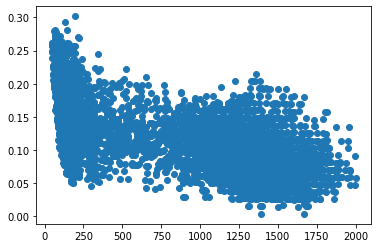

In [19]:
X = df.iloc[:,2]
y = df.iloc[:,1]
plt.scatter(X,y);

In [20]:
# # import module
# from sklearn.preprocessing import StandardScaler

# # compute required values
# scaler = StandardScaler()
# model = scaler.fit(df)
# scaled_data = model.transform(df)

# # print scaled data
# print(scaled_data)


In [21]:
# from sklearn.decomposition import PCA
# pca_2 = PCA(n_components=3)
# pca_2_result = pca_2.fit_transform(scaled_data)
# print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

# # >> Explained variation per principal component: [0.36198848 0.1920749 ]

# print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))


In [22]:
scaled_data = df

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,max_iter=1000)
kmeans.fit(scaled_data)

KMeans(max_iter=1000, n_clusters=2)

In [24]:
cl = kmeans.predict(scaled_data)
cl.shape

(8100,)

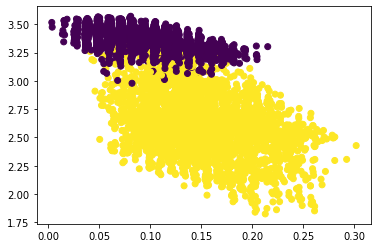

In [25]:
X = df.iloc[:,1]
y = df.iloc[:,-1]
plt.scatter(X,y,c=cl);

In [26]:
kmeans.inertia_

297175864.5954983

In [27]:
# from sklearn.model_selection import ParameterGrid
# import sklearn.metrics as metrics

# # candidate values for our number of cluster
# parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
# # instantiating ParameterGrid, pass number of clusters as input
# parameter_grid = ParameterGrid({'n_clusters': parameters})
# best_score = -1
# kmeans_model = KMeans()     # instantiating KMeans model
# silhouette_scores = []
# # evaluation based on silhouette_score
# for p in parameter_grid:
#     kmeans_model.set_params(**p)    # set current hyper parameter
#     kmeans_model.fit(df)          # fit model on wine dataset, this will find clusters based on parameter p
#     ss = metrics.silhouette_score(df, kmeans_model.labels_)   # calculate silhouette_score
#     silhouette_scores += [ss]       # store all the scores
#     print('Parameter:', p, 'Score', ss)
#     # check p which has the best score
#     if ss > best_score:
#         best_score = ss
#         best_grid = p
# # plotting silhouette score
# plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
# plt.xticks(range(len(silhouette_scores)), list(parameters))
# plt.title('Silhouette Score', fontweight='bold')
# plt.xlabel('Number of Clusters')
# plt.show()


In [28]:
# fitting KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data)

final_cl = kmeans.predict(scaled_data)

In [29]:
# # def min_arr(arr):
# #   min = 255
# #   for i in arr:
# #    if min>i:
# #     min = i
# #   return min

def max_arr(arr):
    max = 0
    for i in range(0,arr.size):
      if max<arr[i]:
       max = arr[i]
    return max

In [30]:
# # max_v = max_arr(cl)# cl = scale_to_0_255(cl
# # final_cl = final_cl*255
max_v = max_arr(final_cl)
final_cl = final_cl*(255/max_v)

In [31]:
final_cl.shape

(8100,)

In [32]:
final_cl = final_cl.reshape(ent.shape[0],ent.shape[1])
final_cl.shape

(90, 90)

In [33]:
final_cl

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [34]:
# import numpy as np

# def scale_to_0_255(arr):
#     min_value = min_arr(arr)
#     max_value = max_arr(arr)

#     scaled_arr = []

#     for value in arr:
#         scaled_value = ((value - min_value) / (max_value - min_value)) * 255
#         scaled_arr.append(scaled_value)

#     return scaled_arr


In [35]:
final_cl

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [36]:
count = 0
for i in final_cl:
  for j in i:
    count+=j

count = count/255
count

3262.0

In [37]:
df_new = pd.DataFrame(final_cl)
df_new.to_csv('sample_data.csv', index=True)


In [38]:
# image = cv2.cvtColor(cl)  # Convert grayscale to BGR (color) image

# # Save the image to a file (optional)
# cv2.imwrite('output.png', image)

grayscale_image = cv2.merge((final_cl,final_cl,final_cl))


# Save the grayscale image to a file (optional)
cv2.imwrite('output.png', grayscale_image)


True

In [52]:
# image = cv2.cvtColor(cl)  # Convert grayscale to BGR (color) image

def max_arr2d(arr):
    max = 0
    for i in range(0,len(arr)):
      for j in range(0,len(arr[0])):
        if max<arr[i][j]:
          max = arr[i][j]

    if(max == 0):
      max = 255
    return max

# # Save the image to a file (optional)
# cv2.imwrite('output.png', image)
# print(max_arr2d(asm))
asm_=asm*(255/max_arr2d(asm))
grayscale_image = cv2.merge((asm_,asm_,asm_))

# Save the grayscale image to a file (optional)
cv2.imwrite('asm.png', grayscale_image)

True

In [53]:
asm_=asm*(255/max_arr2d(asm))
asm = cv2.merge((asm_, asm_, asm_))
asm = asm.astype(np.uint8)
asm_pil = cv2.cvtColor(asm, cv2.COLOR_BGR2RGB)

In [56]:
asm_pil

array([[[43, 43, 43],
        [33, 33, 33],
        [29, 29, 29],
        ...,
        [72, 72, 72],
        [62, 62, 62],
        [49, 49, 49]],

       [[47, 47, 47],
        [35, 35, 35],
        [29, 29, 29],
        ...,
        [75, 75, 75],
        [66, 66, 66],
        [50, 50, 50]],

       [[48, 48, 48],
        [37, 37, 37],
        [28, 28, 28],
        ...,
        [75, 75, 75],
        [68, 68, 68],
        [50, 50, 50]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [ 9,  9,  9],
        [ 8,  8,  8],
        [10, 10, 10]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]]], dtype=uint8)

In [57]:
# cv2.imshow("asm",asm_pil)
cv2.imwrite('asm4.png', asm_pil)

True

In [58]:
idm_=idm*(255/max_arr2d(idm))
idm = cv2.merge((idm_, idm_, idm_))
idm = idm.astype(np.uint8)
idm_pil = cv2.cvtColor(idm, cv2.COLOR_BGR2RGB)
cv2.imwrite('idm4.png', idm_pil)

True

In [59]:
con_=con*(255/max_arr2d(con))
con = cv2.merge((con_, con_, con_))
con = con.astype(np.uint8)
con_pil = cv2.cvtColor(con, cv2.COLOR_BGR2RGB)
cv2.imwrite('con4.png', con_pil)

True

In [60]:
ent_=ent*(255/max_arr2d(ent))
ent = cv2.merge((ent_, ent_, ent_))
ent = ent.astype(np.uint8)
ent_pil = cv2.cvtColor(ent, cv2.COLOR_BGR2RGB)
cv2.imwrite('ent4.png', ent_pil)

True

In [61]:
grayscale_image = cv2.merge((final_cl,final_cl,final_cl))
grayscale_image = grayscale_image.astype(np.uint8)
grayscale_im_pil = cv2.cvtColor(grayscale_image, cv2.COLOR_BGR2RGB)
cv2.imwrite('clustered4.png', grayscale_im_pil)

True

In [ ]:
arr1 = {i: 0 for i in range(2*pixel_range[1]+1)}
arr2 = {i: 0 for i in range(-pixel_range[1], pixel_range[1]+1)}